<h1 align="center">Volume 2: The Fourier Transform.</h1>

    Nathan Schill
    Section 3
    Tues. Dec. 6, 2022

<h2 align="center">Part 1: The Discrete Fourier Transform</h2>

In [151]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import wavfile
from scipy.fftpack import fft

import IPython

In [152]:
plt.rcParams["figure.dpi"] = 300             # Fix plot quality.
plt.rcParams["figure.figsize"] = (12,3)      # Change plot size / aspect (you may adjust this).

In [153]:
class SoundWave(object):
    """A class for working with digital audio signals."""

    # Problem 1.1
    def __init__(self, rate, samples):
        """Set the SoundWave class attributes.

        Parameters:
            rate (int): The sample rate of the sound.
            samples ((n,) ndarray): NumPy array of samples.
        """
        
        # Store rate and samples
        self.rate = rate
        self.samples = samples

    # Problems 1.1 and 1.7
    def plot(self):
        """Plot the graph of the sound wave (time versus amplitude)."""
        
        # Length of the sound wave in seconds according to equation 6.1 in the lab PDF
        sample_len_seconds = len(self.samples)/self.rate

        # len(self.samples) points between 0 and sample_len_seconds
        x = np.linspace(0, sample_len_seconds, len(self.samples))

        # Plot sample amplitudes against time, set y-lims, and plot
        plt.plot(x, self.samples)
        plt.ylim((-32768, 32767))
        plt.show()

    # Problem 1.2
    def export(self, filename, force=False):
        """Generate a wav file from the sample rate and samples. 
        If the array of samples is not of type np.int16, scale it before exporting.

        Parameters:
            filename (str): The name of the wav file to export the sound to.
        """
        
        # True if dtype is int16, False otherwise
        is_int16 = self.samples.dtype == np.int16

        # If sample is not int16 or if force is True, scale sample using equation 6.2 in lab PDF,
        # then write the scaled sample
        if not is_int16 or force:
            wavfile.write(filename, self.rate, np.int16(self.samples / max(self.samples) * 32767))

        # Otherwise, write the original sample
        else:
            wavfile.write(filename, self.rate, self.samples)
    
    # Problem 1.4
    def __add__(self, other):
        """Combine the samples from two SoundWave objects.

        Parameters:
            other (SoundWave): An object containing the samples to add
                to the samples contained in this object.
        
        Returns:
            (SoundWave): A new SoundWave instance with the combined samples.

        Raises:
            ValueError: if the two sample arrays are not the same length.
        """

        # Raise ValueError if two samples are not same length
        if len(self.samples) != len(other.samples):
            raise ValueError('samples should have the same lengths')
        
        # (Assume the two rates are the same)
        # Add the two sample arrays componentwise (note they are np.ndarrays)
        return SoundWave(self.rate, self.samples + other.samples)

    # Problem 1.4
    def __rshift__(self, other):
        """Concatentate the samples from two SoundWave objects.

        Parameters:
            other (SoundWave): An object containing the samples to concatenate
                to the samples contained in this object.

        Raises:
            ValueError: if the two sample rates are not equal.
        """
        
        # Raise ValueError if two samples have different rates
        if self.rate != other.rate:
            raise ValueError('samples should have the same rates')
        
        # Concatenate the two sample arrays (note they are np.ndarrays)
        return SoundWave(self.rate, np.concatenate((self.samples, other.samples)))
    
    # Problem 2.1
    def __mul__(self, other):
        """Convolve the samples from two SoundWave objects using circular convolution.
        
        Parameters:
            other (SoundWave): An object containing the samples to convolve
                with the samples contained in this object.
        
        Returns:
            (SoundWave): A new SoundWave instance with the convolved samples.

        Raises:
            ValueError: if the two sample rates are not equal.
        """
        raise NotImplementedError("Problem 2.1 Incomplete")

    # Problem 2.2
    def __pow__(self, other):
        """Convolve the samples from two SoundWave objects using linear convolution.
        
        Parameters:
            other (SoundWave): An object containing the samples to convolve
                with the samples contained in this object.
        
        Returns:
            (SoundWave): A new SoundWave instance with the convolved samples.

        Raises:
            ValueError: if the two sample rates are not equal.
        """
        raise NotImplementedError("Problem 2.2 Incomplete")

    # Problem 2.4
    def clean(self, low_freq, high_freq):
        """Remove a range of frequencies from the samples using the DFT. 

        Parameters:
            low_freq (float): Lower bound of the frequency range to zero out.
            high_freq (float): Higher boound of the frequency range to zero out.
        """
        raise NotImplementedError("Problem 2.4 Incomplete")

### Problem 1.1

- Implement `SoundWave.__init__()`.
- Implement `SoundWave.plot()`.
- Use the `scipy.io.wavfile.read()` and the `SoundWave` class to plot `tada.wav`.

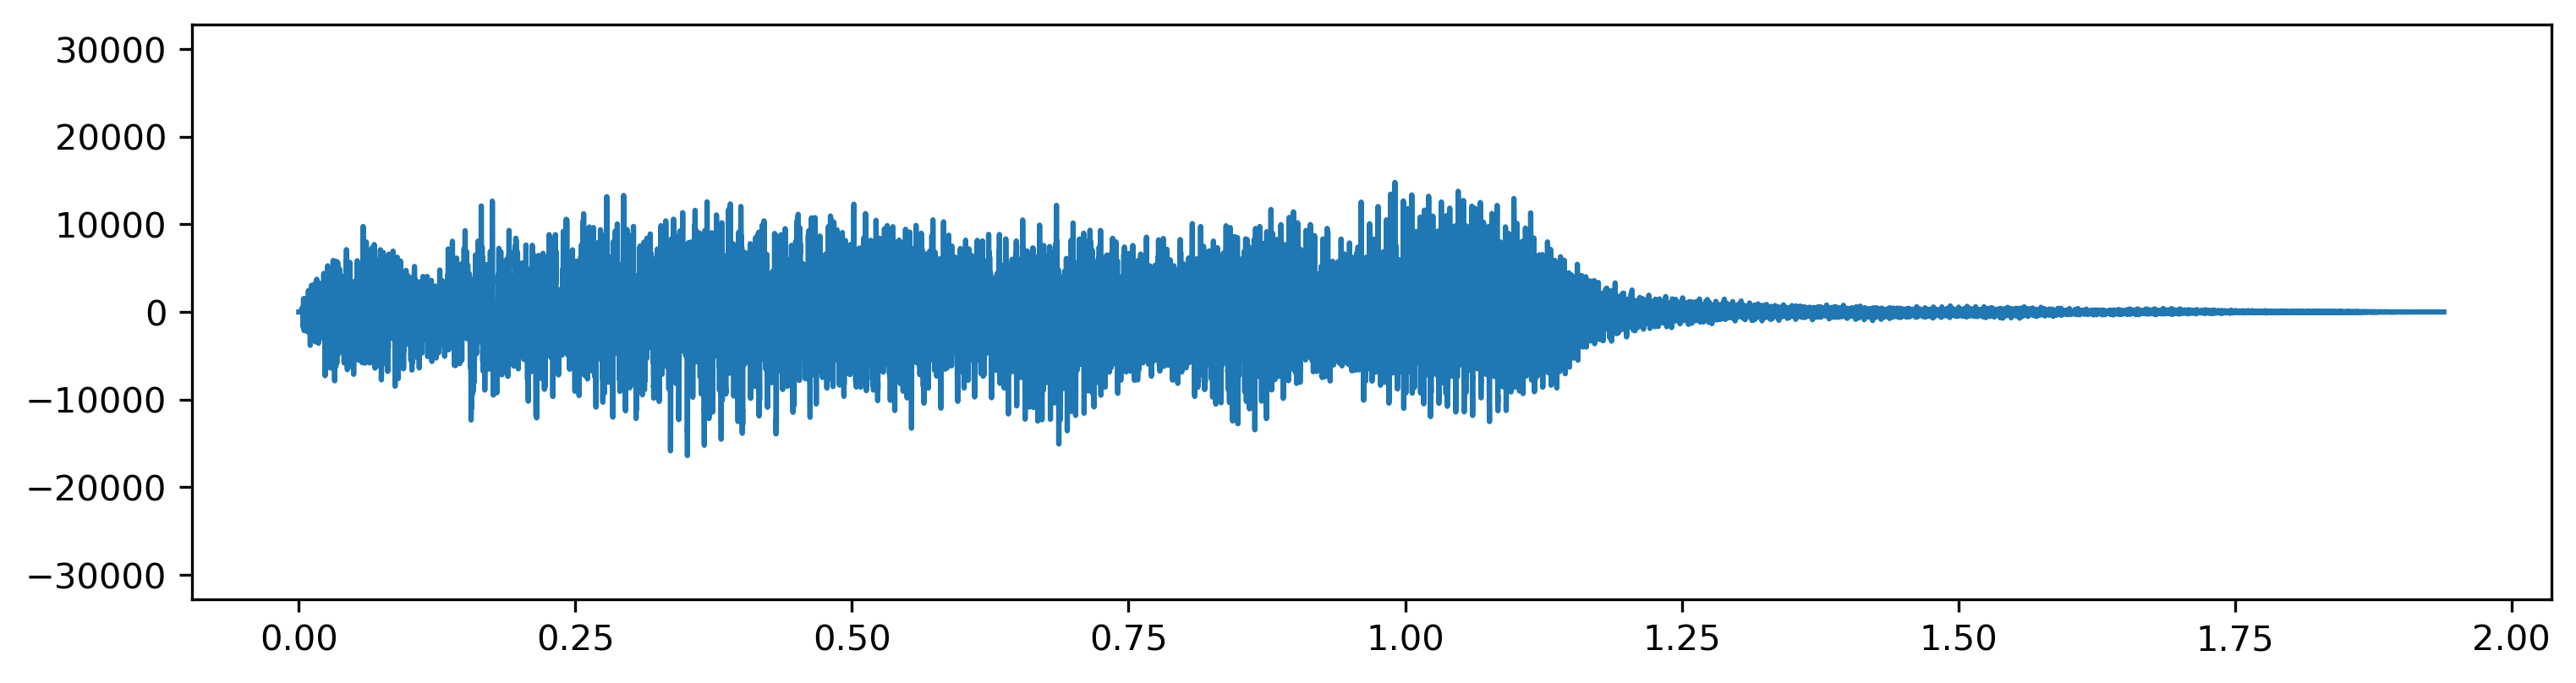

In [154]:
# Get rate and samples from file and unpack into SoundWave object
file = 'tada.wav'
wavy = SoundWave(*wavfile.read(file))

# Plot file
wavy.plot()

### Problem 1.2

- Implement `SoundWave.export()`.
- Use the `export()` method to create two new files containing the same sound as `tada.wav`: one without scaling, and one with scaling (use `force=True`).
- Use `IPython.display.Audio()` to embed the original and new versions of `tada.wav` in the notebook.

In [155]:
# The new file names
file_n_scale = 'tada_n_scale.wav'
file_y_scale = 'tada_y_scale.wav'

# Export without and with scaling
wavy.export(file_n_scale, force=False)
wavy.export(file_y_scale, force=True)

In [156]:
# Display each file in this and the following cells
IPython.display.Audio('tada.wav')

In [157]:
IPython.display.Audio(file_n_scale)

In [158]:
IPython.display.Audio(file_y_scale)

### Problem 1.3

- Implement `generate_note()`.
- Use `generate_note()` to create an A tone that lasts for two seconds. Embed it in the notebook.

In [159]:
def generate_note(frequency, duration):
    """Generate an instance of the SoundWave class corresponding to 
    the desired soundwave. Uses sample rate of 44100 Hz.
    
    Parameters:
        frequency (float): The frequency of the desired sound.
        duration (float): The length of the desired sound in seconds.
    
    Returns:
        sound (SoundWave): An instance of the SoundWave class.
    """

    # Sample rate to use
    rate = 44100

    # Number of samples for sound of duration seconds according to lab PDF
    num_samples = rate * duration
    x = np.linspace(0, duration, num_samples)

    # Sample values according to lab PDF
    samples = np.sin(2*np.pi * frequency * x)

    return SoundWave(rate, samples)

In [160]:
# Frequency for note A (440) and duration of 2 seconds
k, s = 440, 2
A_wavy = generate_note(k, s)

# Display note
IPython.display.Audio(rate=A_wavy.rate, data=A_wavy.samples)

### Problem 1.4

- Implement `SoundWave.__add__()`.
- Generate a three-second A minor chord (A, C, and E) and embed it in the notebook.
- Implement `SoundWave.__rshift__()`.
- Generate the arpeggio A$\,\rightarrow\,$C$\,\rightarrow\,$E, where each tone lasts one second, and embed it in the notebook.

In [161]:
# Frequencies of chord and duration of each note
a_minor_freqs = (440, 523.25, 659.25)
note_duration = 1

# List of SoundWave objects
a_minor_notes = [generate_note(freq, note_duration) for freq in a_minor_freqs]

In [162]:
# Add the notes (must use start keyword to make sum work)
a_minor_chord = sum(a_minor_notes[1:], start=a_minor_notes[0])

# Display
IPython.display.Audio(rate=a_minor_chord.rate, data=a_minor_chord.samples)

In [163]:
# Rshift the notes together
a_minor_arp = a_minor_notes[0]
[(a_minor_arp := a_minor_arp >> note) for note in a_minor_notes[1:]] 

# Display
IPython.display.Audio(rate=a_minor_arp.rate, data=a_minor_arp.samples)

### Problem 1.5

- Implement `simple_dft()` with the formula $c=F_nf$, where $F_n$ is the n-dimensional DFT matrix.
- Use `np.allclose()` to check that `simple_dft()` and `scipy.fftpack.fft()` give the same result (after scaling).

In [167]:
def simple_dft(samples):
    """Compute the DFT of an array of samples.

    Parameters:
        samples ((n,) ndarray): an array of samples.
    
    Returns:
        ((n,) ndarray): The DFT of the given array.
    """

    n = len(samples)

    Wn = np.array([[np.exp(2*np.pi*1j/n * i * k) for i in range(n)] for k in range(n)]).T

    return 1/n * Wn @ samples

    

In [168]:
n = 10
for i in range(1):
    sample = np.random.randint(-32768, 32767, n, dtype=np.int16)
    mine, sp = n*simple_dft(sample), fft(sample)
    print(mine, sp, sep='\n')

[-12422.        +0.00000000e+00j -19663.35133468+2.47574262e+04j
  27386.39579646+4.61261558e+04j -62930.14866532+3.13498194e+04j
 -21217.89579646+3.87027726e+04j  -5198.        -3.22162935e-11j
 -21217.89579646-3.87027726e+04j -62930.14866532-3.13498194e+04j
  27386.39579646-4.61261558e+04j -19663.35133468-2.47574262e+04j]
[-12422.            -0.j         -19663.35133468-24757.4261791j
  27386.39579646-46126.1557774j  -62930.14866532-31349.81938124j
 -21217.89579646-38702.77263258j  -5198.            -0.j
 -21217.89579646+38702.77263258j -62930.14866532+31349.81938124j
  27386.39579646+46126.1557774j  -19663.35133468+24757.4261791j ]


### Problem 1.6

- Implement `simple_fft()`.
- Generate an array of $8192$ random samples and take its DFT using `simple_dft()`, `simple_fft()`, and `scipy.fftpack.fft()`.
Print the runtimes of each computation.
- Use `np.allclose()` to check that `simple_fft()` and `scipy.fftpack.fft()` give the same result (after scaling).

In [ ]:
def simple_fft(samples, threshold=1):
    """Compute the DFT using the FFT algorithm.
    
    Parameters:
        samples ((n,) ndarray): an array of samples.
        threshold (int): when a subarray of samples has fewer
            elements than this integer, use simple_dft() to
            compute the DFT of that subarray.
    
    Returns:
        ((n,) ndarray): The DFT of the given array.
    """
    raise NotImplementedError("Problem 1.6 Incomplete")

### Problem 1.7

- Modify `SoundWave.plot()` so that it accepts a boolean. When the boolean is `True`, take the DFT of the stored samples and plot (in a new subplot) the frequencies present on the $x$-axis and the magnituds of those frequences on the $y$-axis. Only the display the first half of the plot, and adjust the $x$-axis so that it correctly shows the frequencies in Hertz.
- Display the plot of the DFT of an A tone.
- Display the plot of the DFT of an A minor chord.

### Problem 1.8

Use the DFT to determine the individual notes that are present in `mystery_chord.wav`.

The notes are...

<h2 align="center">Part 2: Convolution and Filtering.</h2>

### Problem 2.1

- Implement `SoundWave.__mul__()` for circular convolution.
- Generate 2 seconds of white noise at the same sample rate as `tada.wav`.
- Compute the circular convolution of `tada.wav` and the white noise. Embed the result in the notebook.
- Append the circular convolution to itself and embed the result in the notebook.

### Problem 2.2

- Implement `SoundWave.__pow__()` for linear convolution.
- Time the linear convolution of `CGC.wav` and `GCG.wav` using `SoundWave.__pow__()` and `scipy.signal.fftconvolve()`.
- Embed the two original sounds and their convolutions in the notebook. Check that the convolutions with `SoundWave.__pow__()` and `scipy.signal.fftconvolve()` sound the same.

### Problem 2.3

Use `SoundWave.__pow__()` or `scipy.signal.fftconvolve()` to compute the linear convolution of `chopin.wav` and `balloon.wav`.
Embed the two original sounds and their convolution in the notebook.

### Problem 2.4

- Implement `SoundWave.clean()`.
- Clean `noisy1.wav` by filtering out frequencies from $1250$-$2600$ Hz. Embed the original and the cleaned versions in the notebook.
- Clean `noisy2.wav`. Embed the original and the cleaned versions in the notebook.

### Problem 2.5

- Clean `vuvuzela.wav` by filtering bad frequencies out of the left and right channels individually.
- Recombine the left and right channels and embed the result in the notebook.

### Problem 2.6

- Clean up `license_plate.png` so that the year printed on the sticker in the bottom right corner of the plate is legible.
- Display the original and cleaned images.

The year on the sticker is...